# Quickstart

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bdms

## Birth, death, and mutation processes

We define a simple binary process.

In [2]:
birth_process = bdms.poisson.DiscreteProcess([1.0, 2.0])
death_process = bdms.poisson.ConstantProcess(1.0)
mutation_process = bdms.poisson.ConstantProcess(1.0)
mutator = bdms.mutators.DiscreteMutator((0, 1), np.array([[0, 1], [1, 0]]))

## Simulation

Initialize random number generator

In [3]:
rng = np.random.default_rng(seed=0)

Initialize a tree with a root node in state 0

In [4]:
tree = bdms.Tree()
tree.state = 0

Simulate for a specified time

In [5]:
time_to_sampling = 10.0

tree.evolve(
    time_to_sampling,
    birth_process=birth_process,
    death_process=death_process,
    mutation_process=mutation_process,
    mutator=mutator,
    seed=rng,
)

Randomly sample survivor tips

In [6]:
tree.sample_survivors(p=0.5, seed=rng)

## Visualization

Define keyword arguments that we'll use repeatedly for tree visualization

In [7]:
viz_kwargs = dict(
    color_map={0: "red", 1: "blue"},
    units="in",
    h=5,
    scale=20,
)

Render the full simulated tree

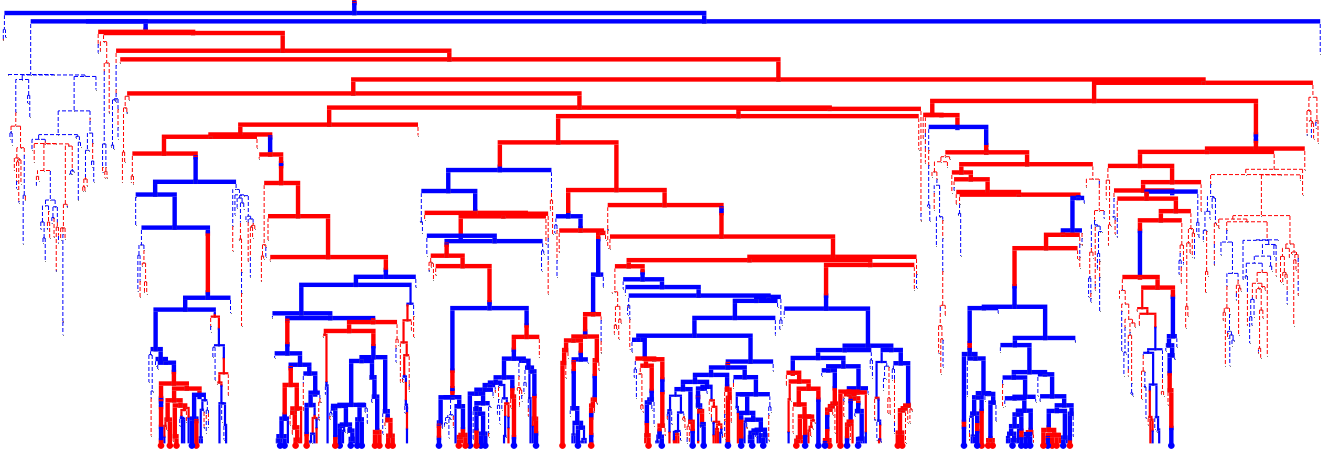

In [8]:
tree.render("%%inline", **viz_kwargs)

## Partially observed trees

Prune the tree to only include the ancestry of the sampled leaves

In [9]:
tree.prune()

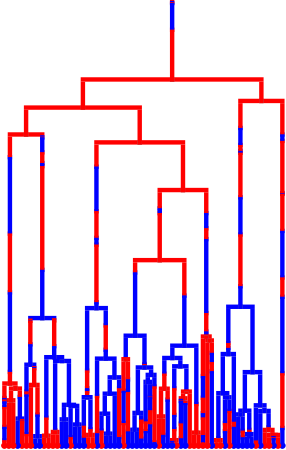

In [10]:
tree.render("%%inline", **viz_kwargs)

Also remove the mutation event unifurcations

In [11]:
tree.remove_mutation_events()

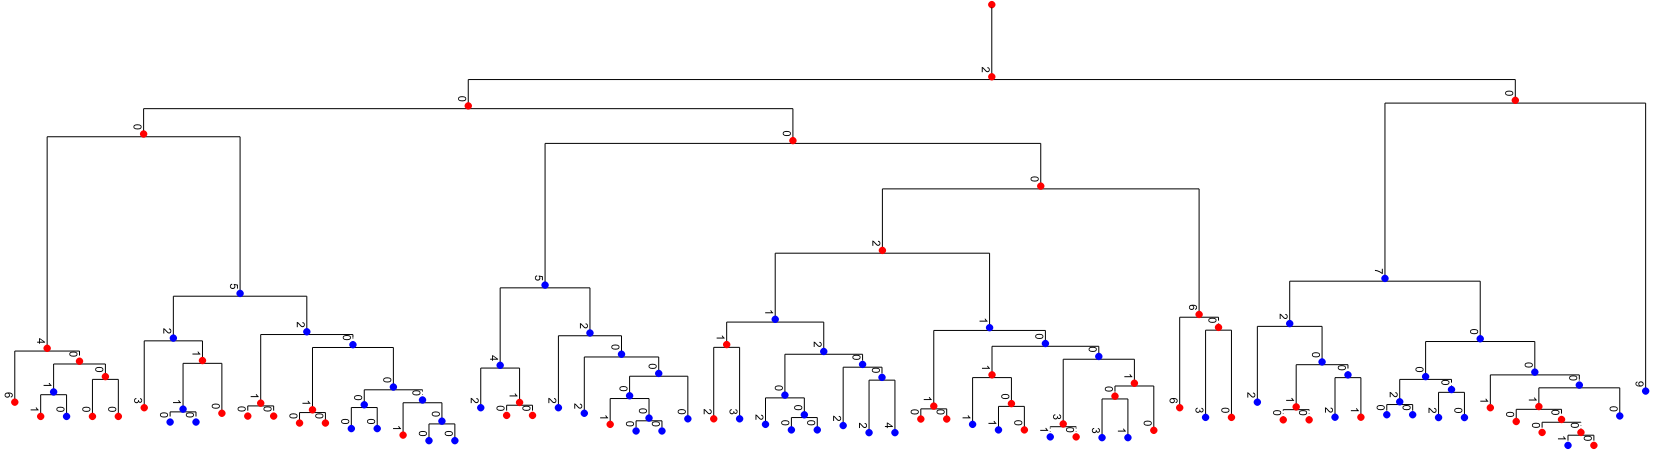

In [12]:
tree.render("%%inline", **viz_kwargs)

## Inhomogeneous processes

We subclass the abstract class `bdms.poisson.InhomogeneousProcess`.
To concretize, we must override the abstract `λ_inhomogeneous(x, t)` method.
We'll use this for a death rate that linearly increases over time, and is independent of state.

In [13]:
class RampingProcess(bdms.poisson.InhomogeneousProcess):
    def __init__(self, intercept, slope, *args, **kwargs):
        self.intercept = intercept
        self.slope = slope
        super().__init__(*args, **kwargs)

    def λ_inhomogeneous(self, x, t):
        return self.intercept + self.slope * t

In [14]:
death_process = RampingProcess(0.5, 0.06)

Initialize tree as before

In [15]:
tree = bdms.Tree()
tree.state = 0

Simulate, sample, and visualize

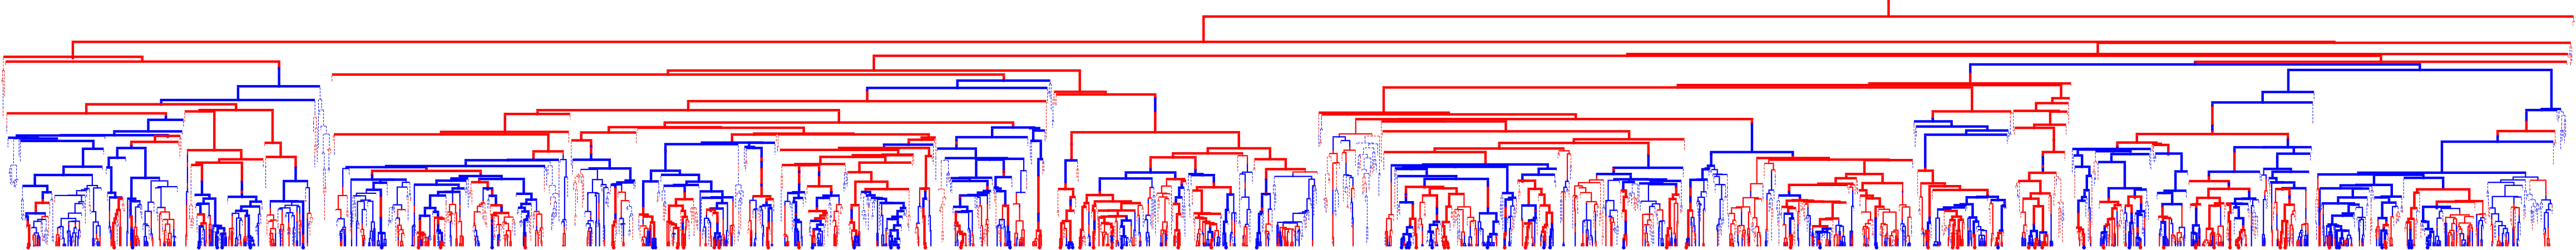

In [16]:
tree.evolve(
    time_to_sampling,
    birth_process=birth_process,
    death_process=death_process,
    mutation_process=mutation_process,
    mutator=mutator,
    seed=rng,
)
tree.sample_survivors(p=0.1, seed=rng)
tree.render("%%inline", **viz_kwargs)

Prune and visualize

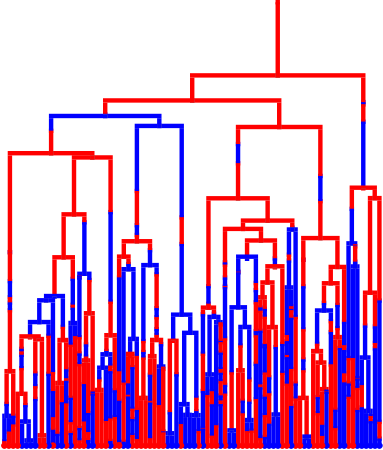

In [17]:
tree.prune()
tree.render("%%inline", **viz_kwargs)

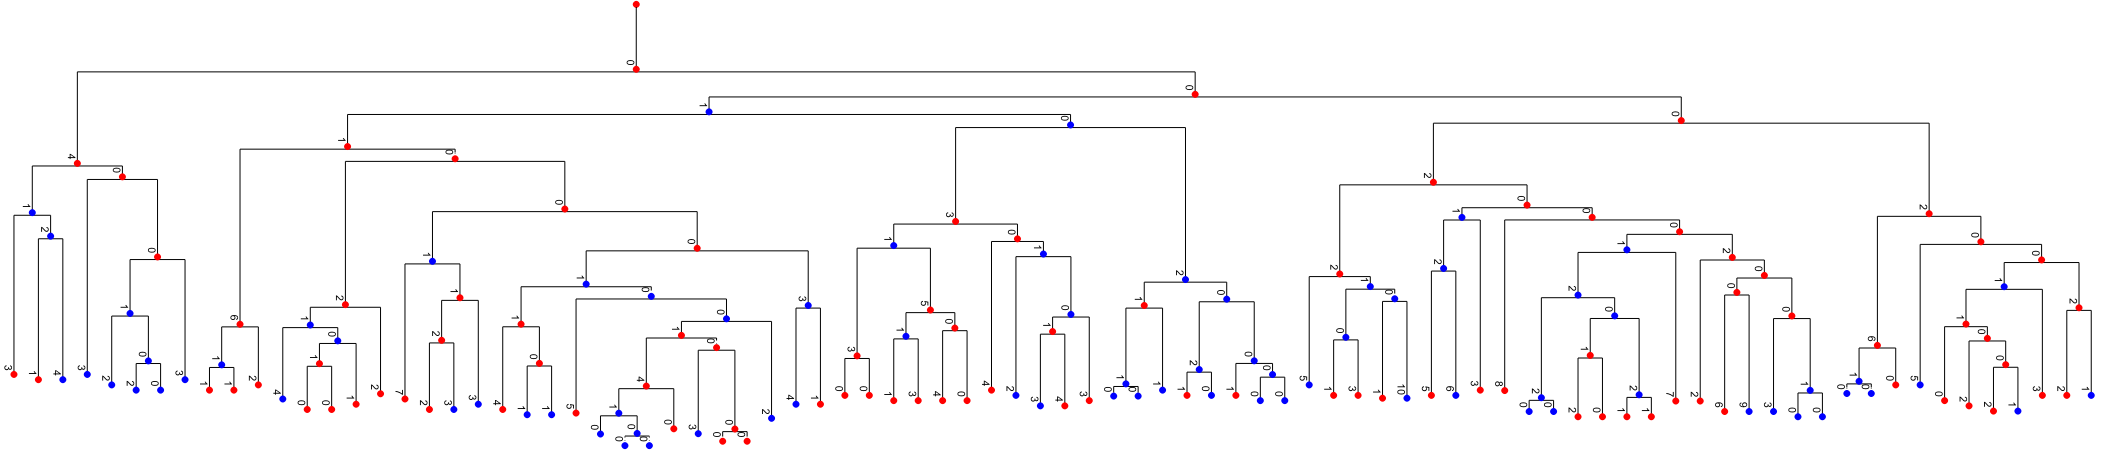

In [18]:
tree.remove_mutation_events()
tree.render("%%inline", **viz_kwargs)